In [3]:
!pip install --upgrade tensorflow

    100% |████████████████████████████████| 51.1MB 19kB/s  eta 0:00:01
    100% |████████████████████████████████| 3.3MB 328kB/s eta 0:00:01
    100% |████████████████████████████████| 9.3MB 112kB/s eta 0:00:01
Requirement not upgraded as not directly required: numpy>=1.13.3 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from tensorflow)
Requirement not upgraded as not directly required: wheel>=0.26 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from tensorflow)
Requirement not upgraded as not directly required: six>=1.10.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from tensorflow)
Requirement not upgraded as not directly required: setuptools<=39.1.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from tensorflow)
Requirement not upgraded as not directly required: protobuf>=3.4.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from tensorflow)
    100% |████████████████████████████████| 92kB 7.3MB/s eta 0:00:01
Re

In [2]:
!pip install opencv-python

    100% |████████████████████████████████| 25.0MB 40kB/s  eta 0:00:01
Requirement not upgraded as not directly required: numpy>=1.11.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from opencv-python)


In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.core import Dense, Flatten, Activation, Reshape
#from moviepy.editor import VideoFileClip
from IPython.display import HTML
import cv2
import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
keras.backend.set_image_dim_ordering('th')

In [3]:
model = Sequential()
# Parameters of the Convolution2D layer is as follows:
# no of filters, dimension of the filter, dimension of the input, border mode, subsample
model.add(Convolution2D(16, 3, 3, input_shape = (3, 448, 448), border_mode = 'same', subsample = (1, 1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, 3, 3, border_mode = 'same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), border_mode='valid'))
model.add(Convolution2D(64,3,3 ,border_mode='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),border_mode='valid'))
model.add(Convolution2D(128,3,3 ,border_mode='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),border_mode='valid'))
model.add(Convolution2D(256,3,3 ,border_mode='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),border_mode='valid'))
model.add(Convolution2D(512,3,3 ,border_mode='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),border_mode='valid'))
model.add(Convolution2D(1024,3,3 ,border_mode='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Convolution2D(1024,3,3 ,border_mode='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Convolution2D(1024,3,3 ,border_mode='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Flatten())
model.add(Dense(256))
model.add(Dense(4096))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(1470))

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), padding="same", strides=(1, 1), input_shape=(3, 448, 4...)`
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same")`
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:9: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), padding="valid")`
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:12: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), padding="valid")`
/opt/conda/envs/DSX-Python3

In [4]:
def load_weights(model,yolo_weight_file):

    tiny_data = np.fromfile(yolo_weight_file,np.float32)[4:]

    index = 0
    for layer in model.layers:
        weights = layer.get_weights()
        if len(weights)>0:
            filter_shape, bias_shape = [w.shape for w in weights]
            if len(filter_shape)>2: #For convolutional layers
                filter_shape_i = filter_shape[::-1]
                bias_weight = tiny_data[index:index+np.prod(bias_shape)].reshape(bias_shape)
                index += np.prod(bias_shape)
                filter_weight= tiny_data[index:index+np.prod(filter_shape_i)].reshape(filter_shape_i)
                filter_weight= np.transpose(filter_weight,(2,3,1,0))
                index += np.prod(filter_shape)
                layer.set_weights([filter_weight,bias_weight])
            else: #For regular hidden layers
                bias_weight = tiny_data[index:index+np.prod(bias_shape)].reshape(bias_shape)
                index += np.prod(bias_shape)
                filter_weight= tiny_data[index:index+np.prod(filter_shape)].reshape(filter_shape)
                index += np.prod(filter_shape)
                layer.set_weights([filter_weight,bias_weight])

class Box:
    def __init__(self):
        self.x, self.y = float(), float()
        self.w, self.h = float(), float()
        self.c = float()
        self.prob = float()

def overlap(x1, w1, x2, w2):
    l1 = x1 - w1/2
    l2 = x2 - w2/2
    left = max(l1, l2)
    r1 = x1 + w1/2
    r2 = x2 + w2/2
    right = min(r1, r2)
    return right - left

def box_intersection(a, b):
    w = overlap(a.x, a.w, b.x, b.w)
    h = overlap(a.y, a.h, b.y, b.h)
    if w < 0 or h < 0:
        return 0
    area = w * h
    return area

def box_union(a, b):
    i = box_intersection(a, b)
    u = a.w * a.h + b.w * b.h - i
    return u

def box_iou(a, b):
    return box_intersection(a, b)/box_union(a, b)

def yolo_net_out_to_car_boxes(net_out, threshold = 0.2, sqrt = 1.8, C = 20, B = 2, S = 7):
    class_num = 6
    boxes = []
    SS = S * S # Number of grid cells
    prob_size = SS * C # class probabilities
    conf_size = SS * B # confidence for each grid cell

    probs = net_out[0:prob_size]
    confs = net_out[prob_size:(prob_size + conf_size)]
    cords = net_out[(prob_size + conf_size):]
    probs = probs.reshape([SS, C]) # List of probabilities for each grid cell
    confs = confs.reshape([SS, B]) # List of confiences per grid cell for 2 boxes
    cords = cords.reshape([SS, B, 4]) # Box coordinates for each cell for 2 boxes

    for grid in range(SS):
        for b in range(B):
            bx = Box()
            bx.c = confs[grid, b]
            bx.x = (cords[grid, b, 0] + grid % S)/S
            bx.y = (cords[grid, b, 1] + grid // S)/S
            bx.w = cords[grid, b, 2] ** sqrt
            bx.h = cords[grid, b, 3] ** sqrt
            p = probs[grid, :] * bx.c

            for r in p:
                if r > threshold:
                    bx.prob = r
                    boxes.append(bx)

    # Combine the boxes that overlap
    boxes.sort(key = lambda b:b.prob, reverse = True)

    for i in range(len(boxes)):
        boxi = boxes[i]
        if boxi.prob == 0:
            continue
        for j in range(i+1, len(boxes)):
            boxj = boxes[j]
            if box_iou(boxi, boxj) > 0.4: # The two boxes overlap considerably hence ignore it
                boxj.prob  = 0

    boxes = [b for b in boxes if b.prob > 0]
    return boxes

def draw_boxes(boxes, im, crop_dim):
    imgcv = im
    [xmin, xmax] = crop_dim[0]
    [ymin, ymax] = crop_dim[1]
    for b in boxes:
        h, w, _ = imgcv.shape
        left  = int ((b.x - b.w/2.) * w)
        right = int ((b.x + b.w/2.) * w)
        top   = int ((b.y - b.h/2.) * h)
        bot   = int ((b.y + b.h/2.) * h)
        left = int(left*(xmax-xmin)/w + xmin)
        right = int(right*(xmax-xmin)/w + xmin)
        top = int(top*(ymax-ymin)/h + ymin)
        bot = int(bot*(ymax-ymin)/h + ymin)

        if left  < 0    :  left = 0
        if right > w - 1: right = w - 1
        if top   < 0    :   top = 0
        if bot   > h - 1:   bot = h - 1
        thick = int((h + w) // 150)
        cv2.rectangle(imgcv, (left, top), (right, bot), (255,0,0), thick)

        
    #plt.imshow(imgcv)
    #plt.show()
    return imgcv

In [5]:
!wget "http://pjreddie.com/media/files/yolo-tiny.weights"

--2018-08-08 02:06:31--  http://pjreddie.com/media/files/yolo-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/yolo-tiny.weights [following]
--2018-08-08 02:06:32--  https://pjreddie.com/media/files/yolo-tiny.weights
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180357512 (172M) [application/octet-stream]
Saving to: ‘yolo-tiny.weights’

100%[======================================>] 180,357,512  398KB/s   in 8m 29s 

2018-08-08 02:15:01 (346 KB/s) - ‘yolo-tiny.weights’ saved [180357512/180357512]



In [6]:
load_weights(model, 'yolo-tiny.weights')

In [7]:
!wget https://raw.githubusercontent.com/schiyoda/Self-Driving-Car/master/test_images.zip
!unzip test_images.zip

--2018-08-08 02:26:18--  https://raw.githubusercontent.com/schiyoda/Self-Driving-Car/master/test_images.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 390630 (381K) [application/zip]
Saving to: ‘test_images.zip’

100%[======================================>] 390,630     --.-K/s   in 0.02s   

2018-08-08 02:26:19 (20.1 MB/s) - ‘test_images.zip’ saved [390630/390630]

Archive:  test_images.zip
   creating: test_images/
  inflating: test_images/test4.jpg   
   creating: __MACOSX/
   creating: __MACOSX/test_images/
  inflating: __MACOSX/test_images/._test4.jpg  
  inflating: test_images/test1.jpg   
  inflating: __MACOSX/test_images/._test1.jpg  
  inflating: test_images/test3.jpg   
  inflating: __MACOSX/test_images/._test3.jpg  
  inflating: test_images/test2.jpg   
  inflating: __MACOSX/test_im

In [8]:
image_path = './test_images/test3.jpg'
image = plt.imread(image_path)
image_crop = image[200:500, 450:,:]
resized = cv2.resize(image_crop, (448, 448))

In [9]:
batch = np.transpose(resized,(2,0,1))
batch = 2*(batch/255.) - 1
batch = np.expand_dims(batch, axis=0)
out = model.predict(batch)

In [10]:
boxes = yolo_net_out_to_car_boxes(out[0], threshold = 0.18)

In [11]:
print(boxes)

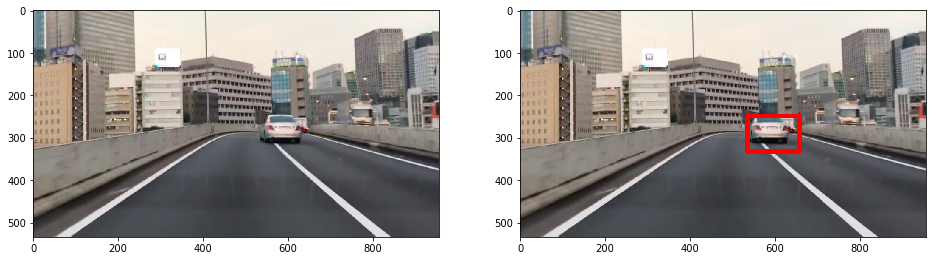

In [12]:
f,(ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
ax1.imshow(image)
ax2.imshow(draw_boxes(boxes,plt.imread(image_path),[[450,950],[200,550]]))

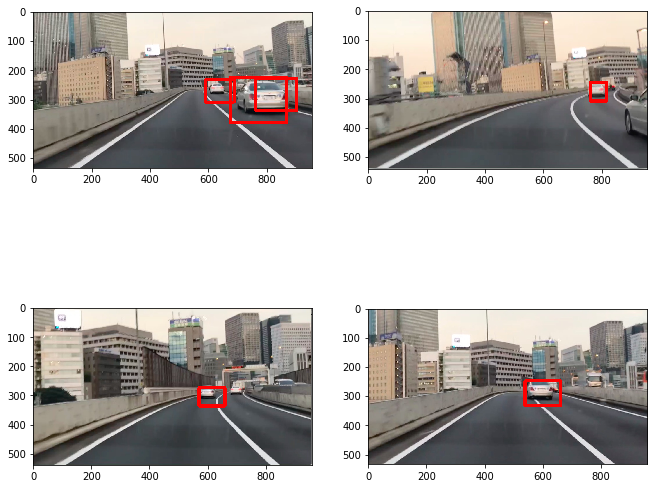

In [20]:
images = [plt.imread(file) for file in glob.glob('./test_images/*.jpg')]
batch = np.array([np.transpose(cv2.resize(image[200:500, 450:,:],(448,448)),(2,0,1)) 
                  for image in images])
batch = 2*(batch/255.) - 1
out = model.predict(batch)
f,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(11,10))
for i,ax in zip(range(len(batch)),[ax1,ax2,ax3,ax4]):
    boxes = yolo_net_out_to_car_boxes(out[i], threshold = 0.18)
    ax.imshow(draw_boxes(boxes,images[i],[[450,950],[200,550]]))

In [21]:
!pip install moviepy

    100% |████████████████████████████████| 378kB 2.5MB/s eta 0:00:01
Requirement not upgraded as not directly required: decorator<5.0,>=4.0.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from moviepy)
Requirement not upgraded as not directly required: imageio<3.0,>=2.1.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from moviepy)
Requirement not upgraded as not directly required: tqdm<5.0,>=4.11.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from moviepy)
Requirement not upgraded as not directly required: numpy in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from moviepy)
  Running setup.py bdist_wheel for moviepy ... done
  Stored in directory: /home/dsxuser/.cache/pip/wheels/ad/92/4d/a6c6307d4c2219d002646bd4a5987e31fd5697f6ea7778b2c0
Successfully built moviepy


In [22]:
from moviepy.editor import VideoFileClip

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.01048576/45929032 bytes (2.3%4259840/45929032 bytes (9.3%7438336/45929032 bytes (16.210543104/45929032 bytes (23.0%13656064/45929032 bytes (29.7%16834560/45929032 bytes (36.7%20029440/45929032 bytes (43.6%23248896/45929032 bytes (50.6%26451968/45929032 bytes (57.6%29646848/45929032 bytes (64.5%32825344/45929032 bytes (71.5%35954688/45929032 bytes (78.3%37937152/45929032 bytes (82.6%40984576/45929032 bytes (89.2%44277760/45929032 bytes (96.4%45929032/45929032 bytes (100.0%)
  Done
File saved as /home/dsxuser/.imageio/ffmpeg/ffmpeg-linux64-v3.3.1.


In [23]:
def frame_func(image):
    crop = image[200:500, 450:,:]
    resized = cv2.resize(crop,(448,448))
    batch = np.array([resized[:,:,0],resized[:,:,1],resized[:,:,2]])
    batch = 2*(batch/255.) - 1
    batch = np.expand_dims(batch, axis=0)
    out = model.predict(batch)
    boxes = yolo_net_out_to_car_boxes(out[0], threshold = 0.18)
    return draw_boxes(boxes,image,[[450,950],[200,550]])

In [24]:
!wget https://raw.githubusercontent.com/schiyoda/Self-Driving-Car/master/driving.mp4

--2018-08-08 02:30:44--  https://raw.githubusercontent.com/schiyoda/Self-Driving-Car/master/driving.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6515854 (6.2M) [application/octet-stream]
Saving to: ‘driving.mp4’

100%[======================================>] 6,515,854   --.-K/s   in 0.09s   

2018-08-08 02:30:45 (69.2 MB/s) - ‘driving.mp4’ saved [6515854/6515854]



In [25]:
project_video_output = './vehicle_detection.mp4'
clip1 = VideoFileClip("./driving.mp4")

In [26]:
lane_clip = clip1.fl_image(frame_func) #NOTE: this function expects color images!!
%time lane_clip.write_videofile(project_video_output, audio=False)

[MoviePy] >>>> Building video ./vehicle_detection.mp4
[MoviePy] Writing video ./vehicle_detection.mp4


100%|██████████| 660/660 [06:04<00:00,  1.81it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./vehicle_detection.mp4 

CPU times: user 16min 23s, sys: 6min 54s, total: 23min 17s
Wall time: 6min 5s


In [27]:
import io
import base64
from IPython.display import HTML

video = io.open('vehicle_detection.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))